# Tutorial 6: Generating Transition Probability Matrices

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/donishadsmith/neurocaps/blob/stable/docs/tutorials/tutorial-6.ipynb) [![Github](https://img.shields.io/badge/Go_to_Source-black.svg?logo=github)](https://github.com/donishadsmith/neurocaps/blob/stable/docs/tutorials/tutorial-6.ipynb)

The ``CAP.calculate_metrics()`` function is designed to compute transition probabilities for all subjects and store these
values into dataframes (one per group). These dataframes can subsequently be used as input for the ``transition_matrix()``
function to generate visualizations of the average transition probabilities per group.

In [1]:
# Download packages
try:
    import neurocaps
except:
    !pip install neurocaps[windows,demo]

In [2]:
import numpy as np

from neurocaps.analysis import CAP, transition_matrix
from neurocaps.utils import simulate_subject_timeseries

np.random.seed(0)

# Simulate `subject_timeseries` structure
subject_timeseries = simulate_subject_timeseries(n_subs=8, n_runs=2, shape=(50, 100))

cap_analysis = CAP()

cap_analysis.get_caps(
    subject_timeseries=subject_timeseries,
    cluster_selection_method="davies_bouldin",
    standardize=True,
    n_clusters=list(range(2, 6)),
)

2025-07-21 20:46:46,631 neurocaps.analysis.cap._internals.cluster [INFO] No groups specified. Using default group 'All Subjects' containing all subject IDs from `subject_timeseries`. The `groups` dictionary will remain fixed unless the `CAP` class is re-initialized or `clear_groups()` is used.
2025-07-21 20:46:46,750 neurocaps.analysis.cap._internals.cluster [INFO] [GROUP: All Subjects | METHOD: davies_bouldin] Optimal cluster size is 5.


In [3]:
outputs = cap_analysis.calculate_metrics(
    subject_timeseries=subject_timeseries,
    return_df=True,
    metrics=["transition_probability"],
    continuous_runs=True,
)

outputs["transition_probability"]["All Subjects"]

,Subject_ID,Group,Run,1.1,1.2,1.3,1.4,1.5,2.1,2.2,...,4.1,4.2,4.3,4.4,4.5,5.1,5.2,5.3,5.4,5.5
0,0,All Subjects,run-continuous,0.277778,0.166667,0.166667,0.277778,0.111111,0.058824,0.294118,...,0.041667,0.083333,0.125000,0.416667,0.333333,0.360000,0.120000,0.120000,0.120000,0.280000
1,1,All Subjects,run-continuous,0.062500,0.437500,0.187500,0.062500,0.250000,0.173913,0.173913,...,0.333333,0.111111,0.166667,0.222222,0.166667,0.000000,0.318182,0.227273,0.227273,0.227273
2,2,All Subjects,run-continuous,0.187500,0.125000,0.187500,0.125000,0.375000,0.217391,0.260870,...,0.050000,0.200000,0.350000,0.200000,0.200000,0.136364,0.227273,0.181818,0.318182,0.136364
3,3,All Subjects,run-continuous,0.125000,0.062500,0.375000,0.312500,0.125000,0.187500,0.062500,...,0.047619,0.285714,0.047619,0.285714,0.333333,0.285714,0.214286,0.214286,0.142857,0.142857
4,4,All Subjects,run-continuous,0.250000,0.250000,0.100000,0.200000,0.200000,0.227273,0.181818,...,0.300000,0.200000,0.150000,0.350000,0.000000,0.142857,0.190476,0.238095,0.238095,0.190476
5,5,All Subjects,run-continuous,0.200000,0.133333,0.000000,0.200000,0.466667,0.111111,0.055556,...,0.136364,0.136364,0.272727,0.136364,0.318182,0.107143,0.321429,0.071429,0.214286,0.285714
6,6,All Subjects,run-continuous,0.266667,0.066667,0.200000,0.200000,0.266667,0.200000,0.250000,...,0.038462,0.269231,0.115385,0.269231,0.307692,0.166667,0.250000,0.125000,0.250000,0.208333
7,7,All Subjects,run-continuous,0.250000,0.187500,0.187500,0.125000,0.250000,0.142857,0.142857,...,0.111111,0.333333,0.111111,0.222222,0.222222,0.133333,0.266667,0.066667,0.166667,0.366667


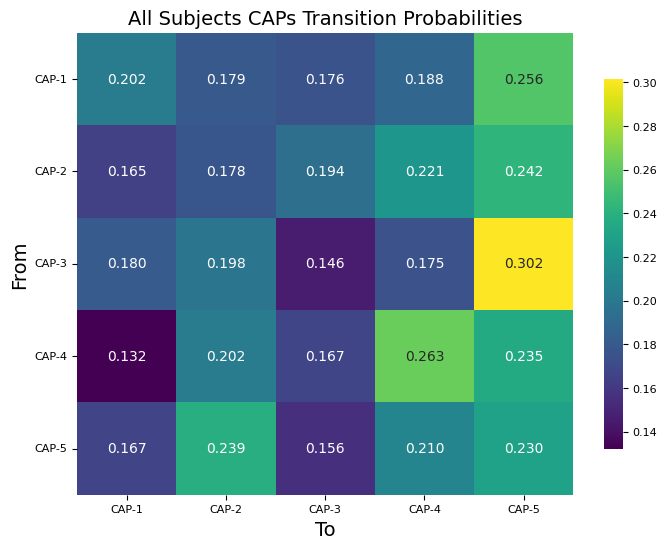

In [4]:
from neurocaps.utils import PlotDefaults

plot_kwargs = PlotDefaults.transition_matrix()
plot_kwargs.update({"cmap": "viridis", "fmt": ".3f", "annot": True})

trans_outputs = transition_matrix(
    trans_dict=outputs["transition_probability"], show_figs=True, return_df=True, **plot_kwargs
)

In [5]:
trans_outputs["All Subjects"]

,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5
From/To,,,,,
CAP-1,0.202431,0.178646,0.175521,0.187847,0.255556
CAP-2,0.164859,0.177704,0.193727,0.221457,0.242254
CAP-3,0.180233,0.197793,0.145511,0.174851,0.301612
CAP-4,0.132319,0.202386,0.167314,0.262802,0.235179
CAP-5,0.166510,0.238539,0.155571,0.209670,0.229710
